#                     Project TIttle:-NLP AND DATA EXTRACTION

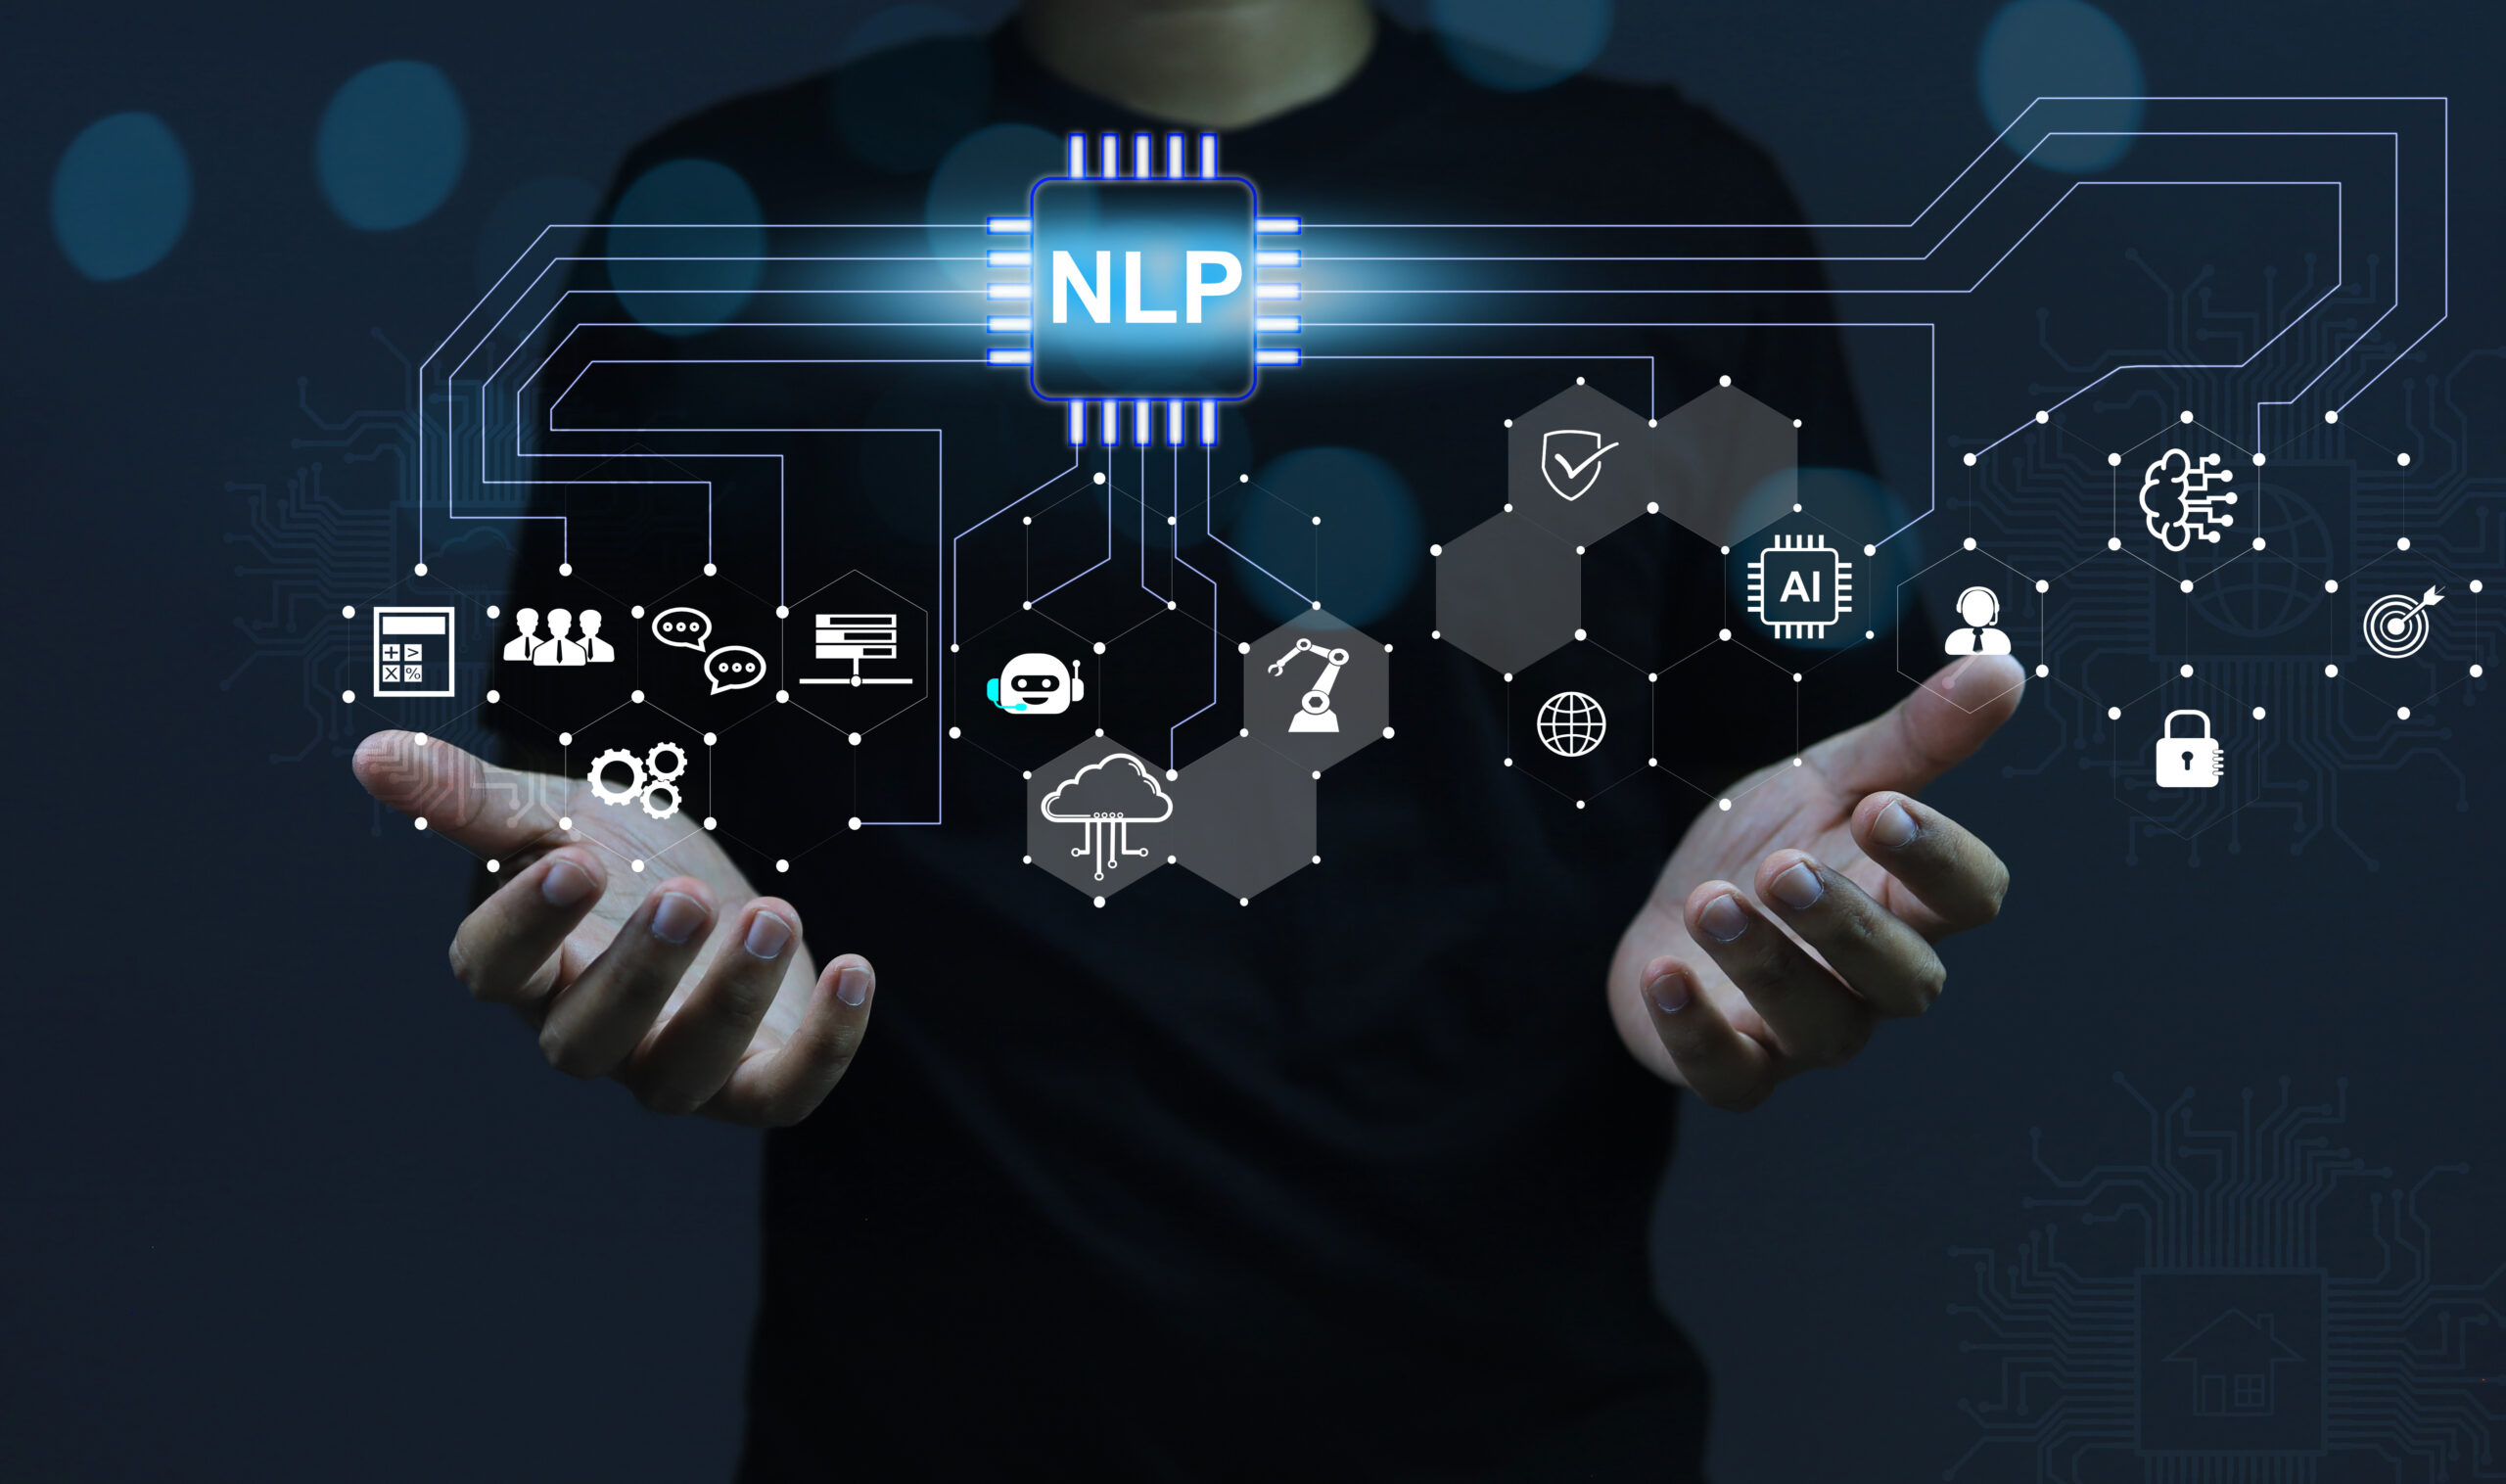

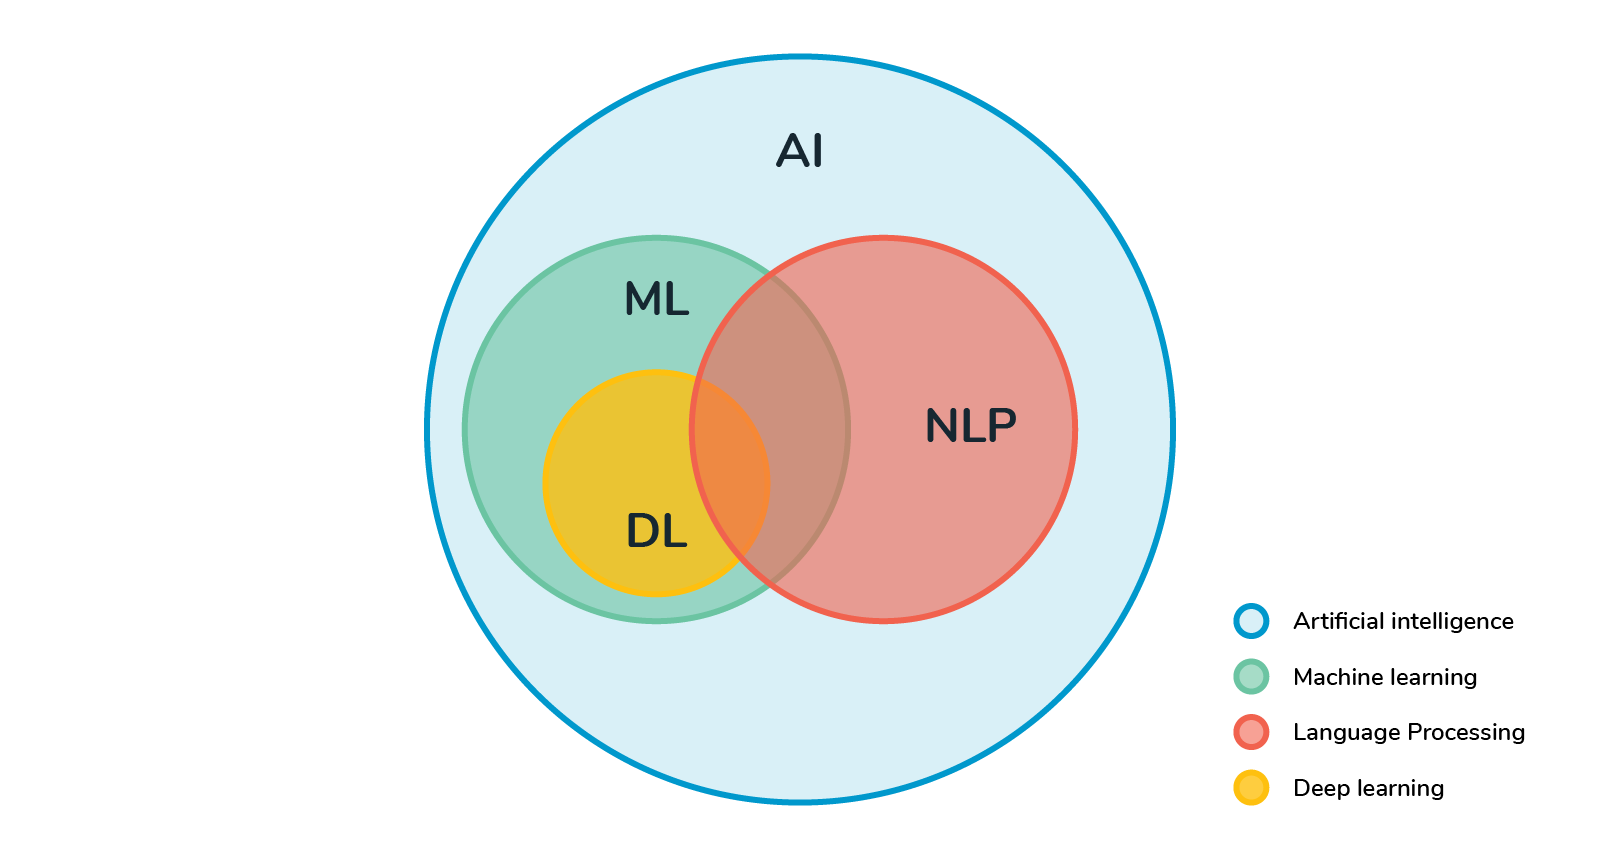

# Objective

The objective of this Project is to utilize Python programming to extract textual data articles from the provided URLs. Following extraction, perform comprehensive text analysis to compute a range of variables, including positive score, negative score, polarity score, subjectivity score, average sentence length, percentage of complex words, fog index, average number of words per sentence, complex word count, word count, syllables per word, personal pronouns, and average word length. The analysis should yield insights into various linguistic and structural aspects of the articles, contributing to a deeper understanding of their content and characteristics.

# Introduction

In this project, we embark on a mission to leverage advanced web extraction and natural language processing (NLP) techniques to extract and analyze valuable insights from Blackcoffer's website. 

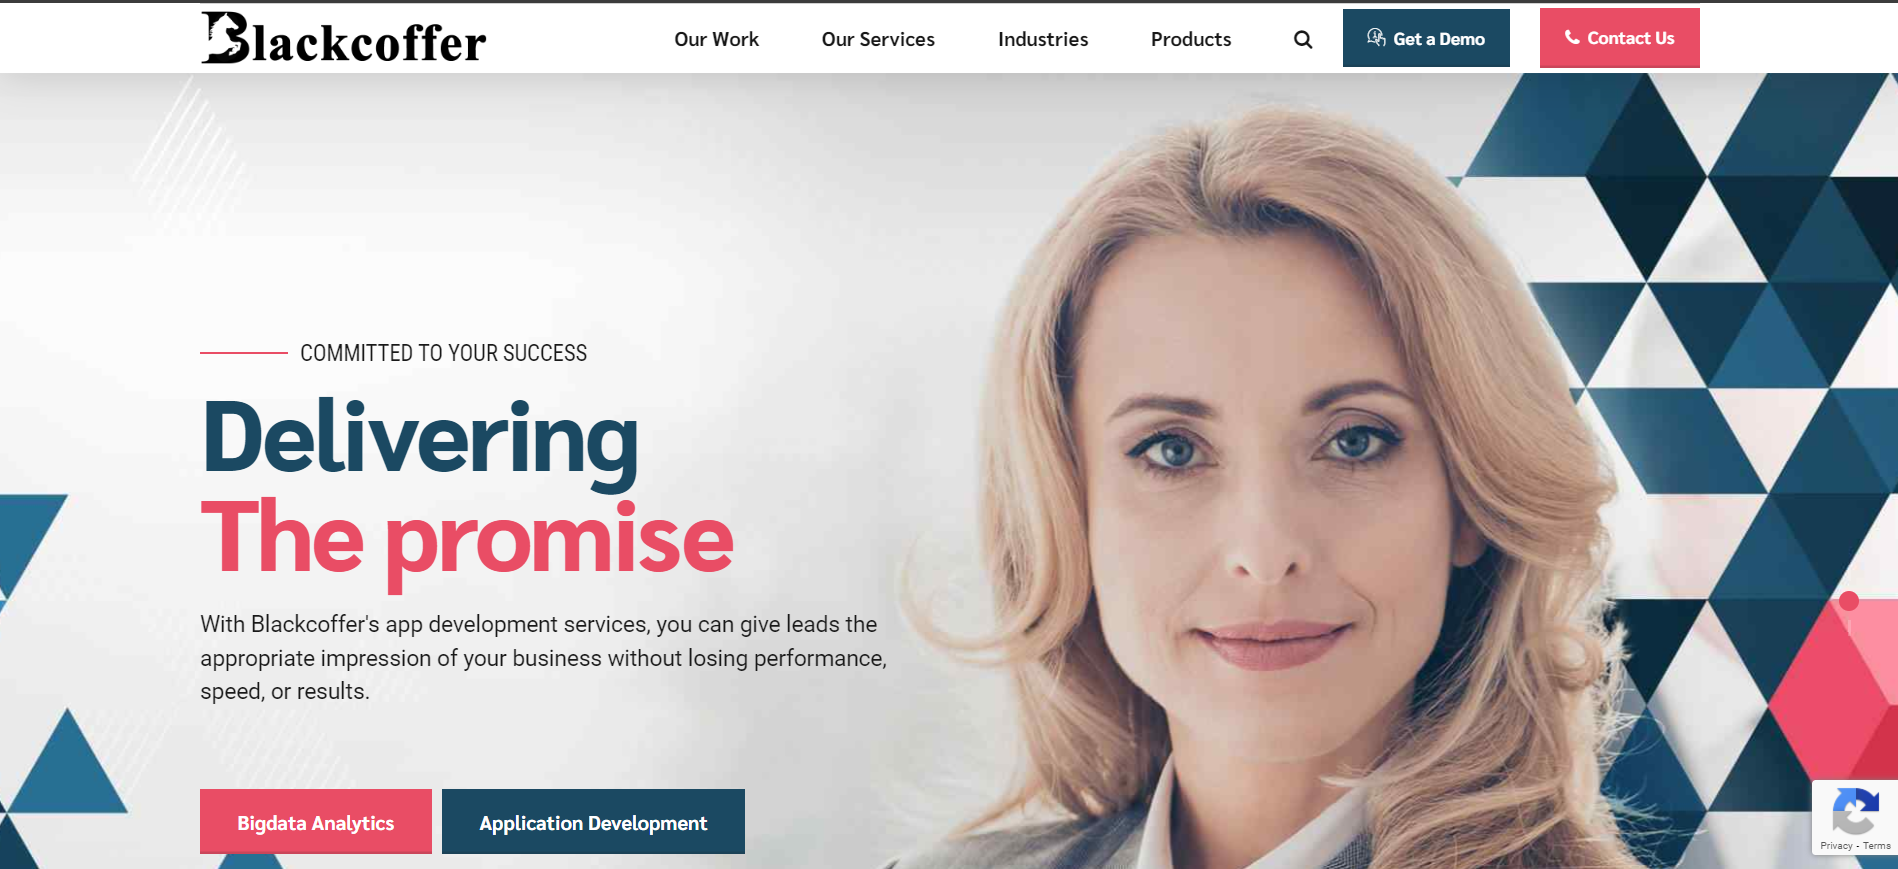

# Key Tasks

Data Extraction: Extract article titles text from the URLs provided in the "Input.xlsx" file. Ensure that only the article title and text are extracted, excluding any website headers, footers, or extraneous content. Save the extracted articles into individual text files named with the URL_ID as specified.

Data Analysis: Perform textual analysis on each extracted article to compute the variables specified in the "Text Analysis.docx" document. These variables include positive score, negative score, polarity score, subjectivity score, average sentence length, percentage of complex words, fog index, average number of words per sentence, complex word count, word count, syllables per word, personal pronouns, and average word length.

Output Data Structure: Generate an output dataset structured according to the format outlined in the "Output Data Structure.xlsx" file. Include all input variables from "Input.xlsx," along with the computed textual analysis variables, in the specified order. Ensure adherence to the provided format for seamless integration with downstream processes.

By completing these tasks, we aim to extract meaningful insights from the textual data articles, enabling informed decision-making and enhancing understanding of the underlying content.

# Going to fill this Input File

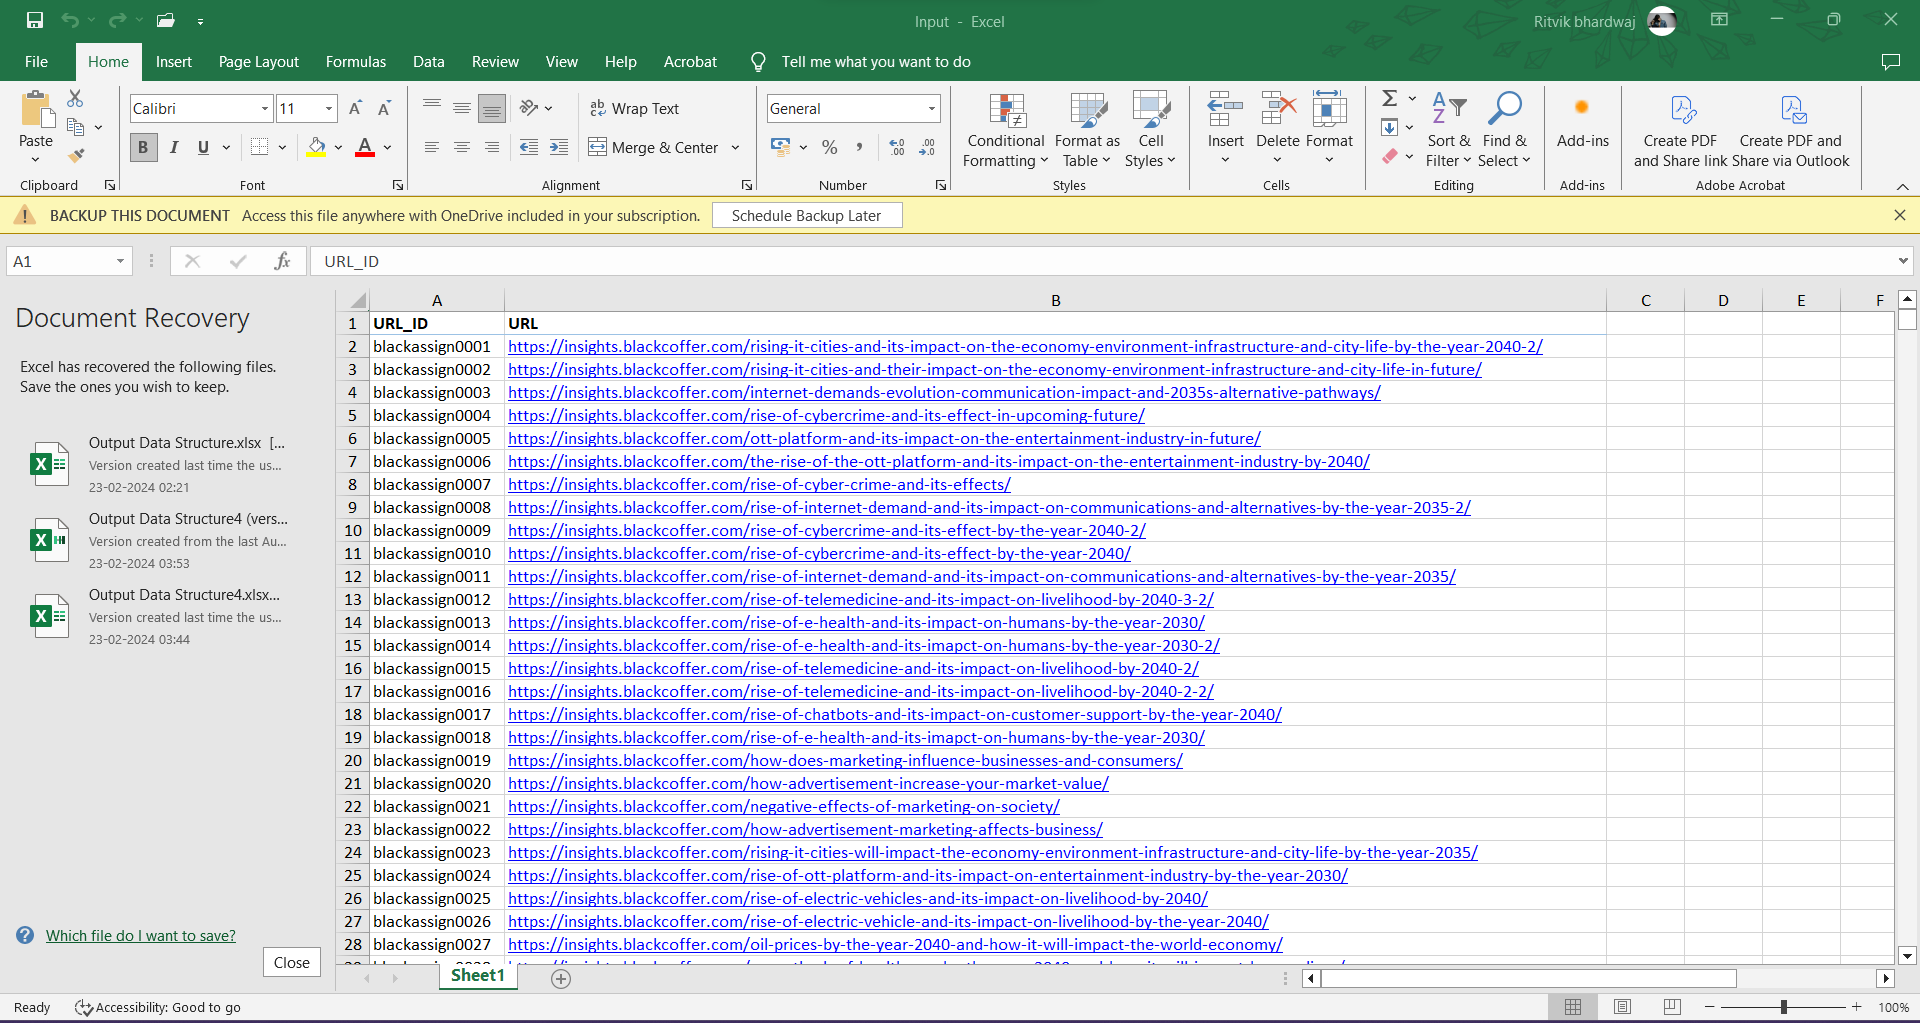

# Importing necessary libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import os

# Web-Scrapping For each article title

In [ ]:
def extract_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    title = soup.find('title').get_text()
    article_text = ' '.join([p.get_text() for p in soup.find_all('p')])
    return title, article_text

# Function to clean the text data to lower case

In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

# Sentiment Analysis For Positive and Negative Score

In [ ]:
def calculate_sentiment_scores(text):
    stop_words = set(stopwords.words('english'))
    positive_words = set(pd.read_csv(r"C:\Users\RITVIK BHARDWAJ\Desktop\Blackcoffer\MasterDictionary-20240217T194701Z-001\MasterDictionary\positive-words.txt", header=None, encoding='latin-1')[0])
    negative_words = set(pd.read_csv(r"C:\Users\RITVIK BHARDWAJ\Desktop\Blackcoffer\MasterDictionary-20240217T194701Z-001\MasterDictionary\negative-words.txt", header=None, encoding='latin-1')[0])
    words = word_tokenize(text)
    clean_words = [word for word in words if word not in stop_words]
    positive_score = sum(1 for word in clean_words if word in positive_words)
    negative_score = sum(1 for word in clean_words if word in negative_words)
    polarity_score = (positive_score - negative_score) / (positive_score + negative_score + 0.000001)
    subjectivity_score = (positive_score + negative_score) / (len(clean_words) + 0.000001)
    return positive_score, negative_score, polarity_score, subjectivity_score

# Calculating All Of The Scores

In [ ]:
# Function to calculate readability scores
def calculate_readability_scores(text):
    sentences = text.split('.')
    total_words = sum(len(word_tokenize(sentence)) for sentence in sentences)
    total_sentences = len(sentences)
    avg_sentence_length = total_words / total_sentences
    words = word_tokenize(text)
    complex_words = [word for word in words if len(word) > 2]
    percentage_complex_words = (len(complex_words) / len(words)) * 100
    fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)
    return avg_sentence_length, percentage_complex_words, fog_index

# Function to calculate average number of words per sentence
def calculate_average_words_per_sentence(text):
    sentences = text.split('.')
    total_words = sum(len(word_tokenize(sentence)) for sentence in sentences)
    total_sentences = len(sentences)
    average_words_per_sentence = total_words / total_sentences
    return average_words_per_sentence

# Function to count complex words
def count_complex_words(text):
    words = word_tokenize(text)
    complex_words = [word for word in words if len(word) > 2]
    return len(complex_words)

# Function to count words
def count_words(text):
    words = word_tokenize(text)
    return len(words)

# Function to count syllables in a word
def count_syllables(word):
    vowels = 'aeiouyAEIOUY'
    syllables = 0
    prev_char_was_vowel = False
    for char in word:
        if char in vowels and not prev_char_was_vowel:
            syllables += 1
            prev_char_was_vowel = True
        elif char not in vowels:
            prev_char_was_vowel = False
    if word.endswith(('e', 'es', 'ed')):
        syllables -= 1
    elif word.endswith('le'):
        syllables += 1
    return max(1, syllables)

# Function to calculate average syllables per word
def calculate_syllable_per_word(text):
    words = word_tokenize(text)
    total_syllables = sum(count_syllables(word) for word in words)
    return total_syllables / len(words)

# Function to count personal pronouns
def count_personal_pronouns(text):
    personal_pronouns = re.compile(r'\b(I|we|ours|my|mine)\b')
    pronouns = personal_pronouns.findall(text)
    return len(pronouns)

# Function to calculate average word length
def calculate_average_word_length(text):
    words = word_tokenize(text)
    total_chars = sum(len(word) for word in words)
    return total_chars / len(words)

# Cleaning Using Stopwords

In [ ]:
# Folder path where the custom stopwords files are located
folder_path = "R:\StopWords"

# List to store custom stopwords
custom_stop_words = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a text file
    if filename.endswith('.txt'):
        # Read the stopwords from the file
        with open(os.path.join(folder_path, filename), 'r') as file:
            words = file.readlines()
            # Remove whitespace and newline characters
            words = [word.strip() for word in words]
            # Extend the list of custom stopwords
            custom_stop_words.extend(words)

# Convert the list of custom stopwords to lowercase
custom_stop_words = [word.lower() for word in custom_stop_words]

# Load NLTK English stopwords
stop_words = set(stopwords.words('english'))

# Combine NLTK stopwords with custom stopwords
all_stop_words = stop_words.union(custom_stop_words)

# Read input URLs from Excel file
input_data = pd.read_excel(r"C:\Users\RITVIK BHARDWAJ\Desktop\Blackcoffer\Input.xlsx")

# Initialize lists to store data
output_data = []

# Processing Each UrL

In [ ]:
for index, row in input_data.iterrows():
    url_id = row['URL_ID']
    url = row['URL']
    title, article_text = extract_article_text(url)
    cleaned_text = clean_text(article_text)
    positive_score, negative_score, polarity_score, subjectivity_score = calculate_sentiment_scores(cleaned_text)
    avg_sentence_length, percentage_complex_words, fog_index = calculate_readability_scores(cleaned_text)
    average_words_per_sentence = calculate_average_words_per_sentence(cleaned_text)
    complex_word_count = count_complex_words(cleaned_text)
    word_count = count_words(cleaned_text)
    syllable_per_word = calculate_syllable_per_word(cleaned_text)
    personal_pronouns_count = count_personal_pronouns(cleaned_text)
    average_word_length = calculate_average_word_length(cleaned_text)
    
    # Append the processed data to output list
    output_data.append([url_id, title, positive_score, negative_score, polarity_score, subjectivity_score,
                        avg_sentence_length, percentage_complex_words, fog_index, average_words_per_sentence,
                        complex_word_count, word_count, syllable_per_word, personal_pronouns_count,
                        average_word_length])

# Creating Dataframe For Output List

In [ ]:
output_df = pd.DataFrame(output_data, columns=['URL_ID', 'Title', 'Positive Score', 'Negative Score',
                                               'Polarity Score', 'Subjectivity Score', 'Avg Sentence Length',
                                               'Percentage of Complex Words', 'Fog Index',
                                               'Avg No of Words per Sentence', 'Complex Word Count',
                                               'Word Count', 'Syllable Per Word', 'Personal Pronouns',
                                               'Average Word Length'])

# Saving the Dataframe To Excel File

In [6]:
output_df.to_excel(r"C:\Users\RITVIK BHARDWAJ\Downloads\Output Data Structure2.xlsx", index=False)

# Final Output

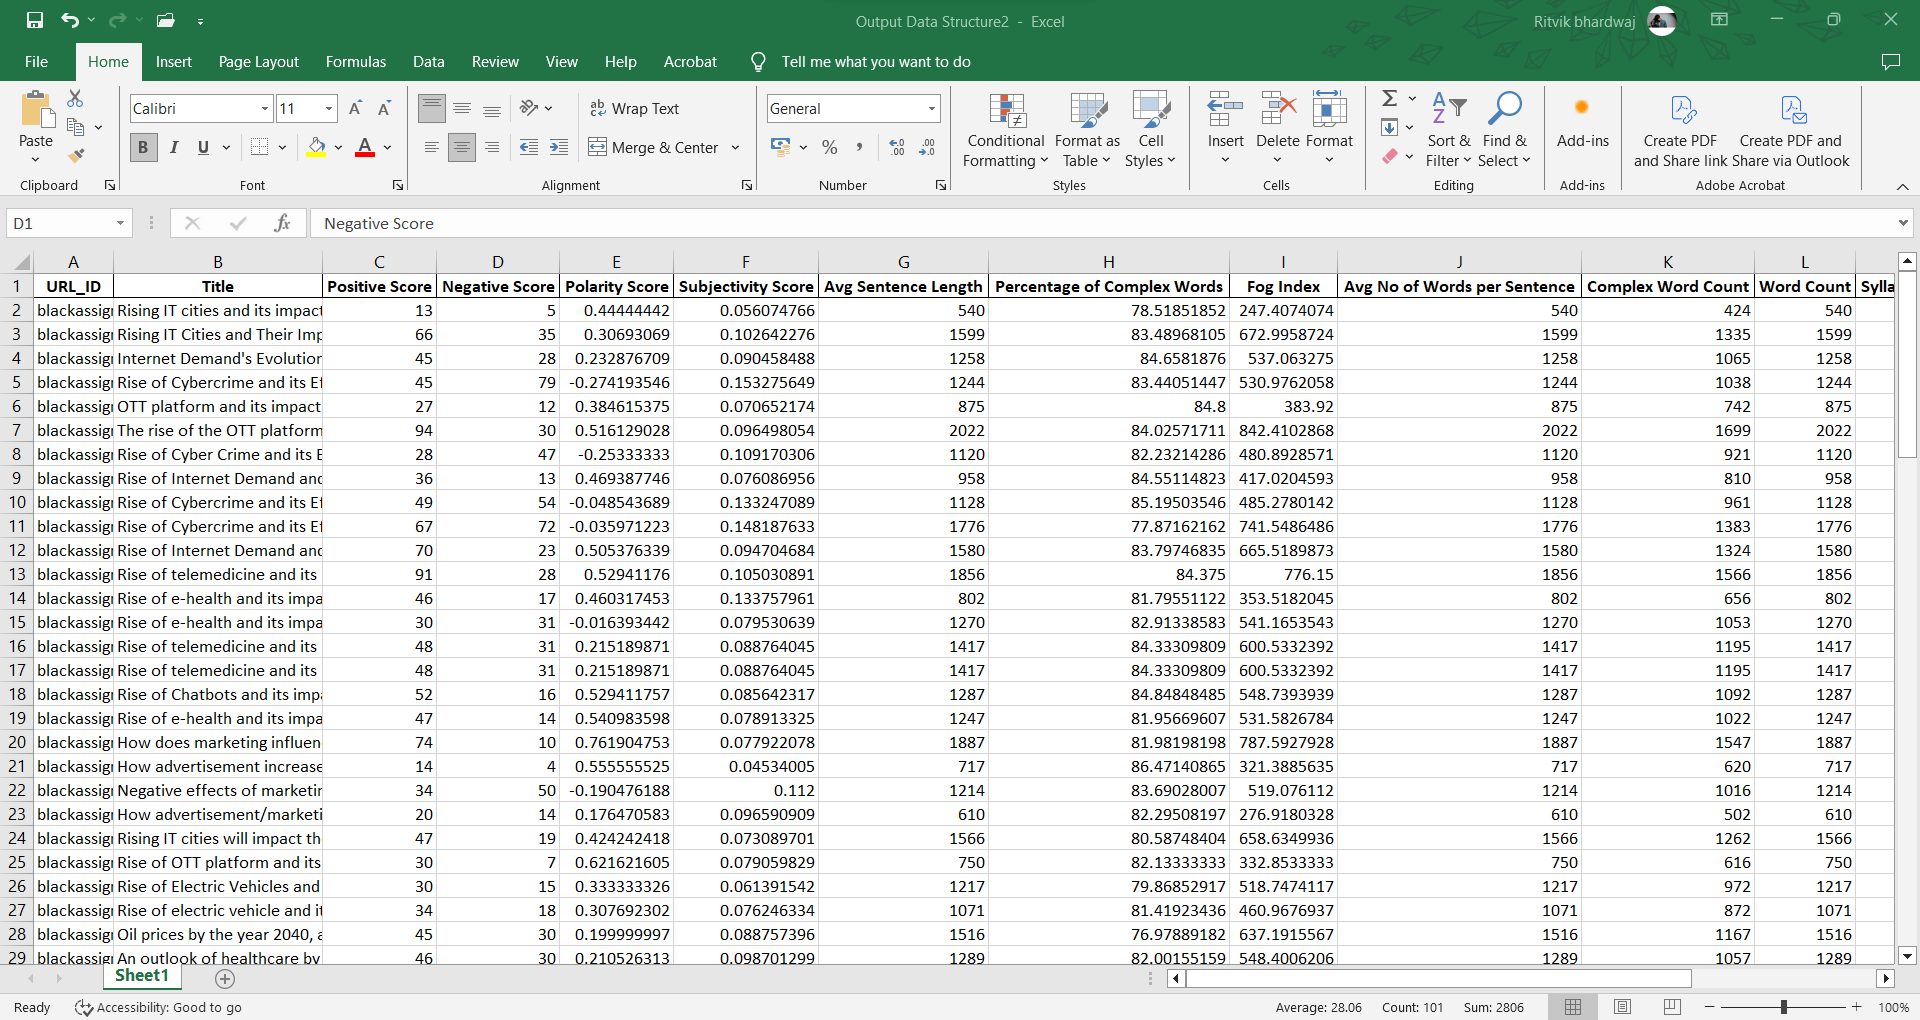

In [9]:
output_df.tail()

,URL_ID,Title,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Avg Sentence Length,Percentage of Complex Words,Fog Index,Avg No of Words per Sentence,Complex Word Count,Word Count,Syllable Per Word,Personal Pronouns,Average Word Length
95,blackassign0096,Due to the COVID-19 the repercussion of the en...,35,61,-0.270833,0.121519,1313.0,81.264280,557.705712,1313.0,1067,1313,1.731912,2,5.314547
96,blackassign0097,Impact of COVID-19 pandemic on office space an...,37,39,-0.026316,0.114286,1271.0,80.723839,540.689536,1271.0,1026,1271,1.520063,5,4.834776
97,blackassign0098,Contribution of handicrafts (Visual Arts & Lit...,6,4,0.200000,0.042373,340.0,85.588235,170.235294,340.0,291,340,1.779412,1,5.491176
98,blackassign0099,How COVID-19 is impacting payment preferences?...,29,7,0.611111,0.079823,736.0,83.695652,327.878261,736.0,616,736,1.612772,3,4.978261
99,blackassign0100,How will COVID-19 affect the world of work? - ...,39,58,-0.195876,0.149231,1118.0,81.842576,479.937030,1118.0,915,1118,1.681574,3,5.262970


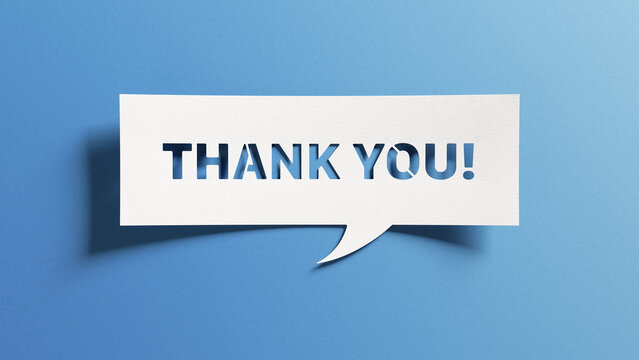

Thank you for joining me on this journey through the exploration of Blackcoffer's website using advanced web extraction and natural language processing techniques. I am grateful for the opportunity to delve into this fascinating realm of data analysis and uncover valuable insights. 